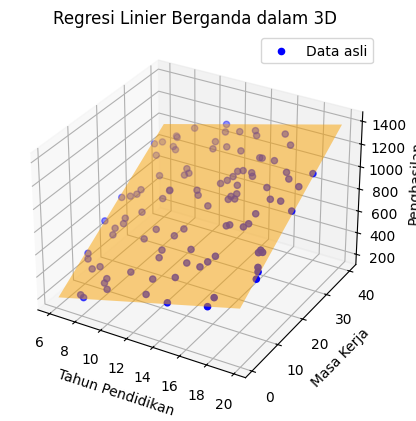

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Membuat data sintetis
np.random.seed(0)
tahun_pendidikan = np.random.rand(100) * 14 + 6  # Pendidikan antara 6 hingga 20 tahun
masa_kerja = np.random.rand(100) * 40  # Masa kerja antara 0 hingga 40 tahun
penghasilan = 30 * tahun_pendidikan + 20 * masa_kerja + np.random.randn(100)  # Penghasilan dalam ribuan rupiah


# Menggabungkan tahun_pendidikan dan masa_kerja menjadi satu matriks
X = np.column_stack((tahun_pendidikan, masa_kerja))

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, penghasilan)

# Memprediksi nilai penghasilan
penghasilan_pred = model.predict(X)

# Membuat grid untuk bidang regresi
# np.meshgrid = digunakan untuk membuat grid 2D dari dua array 1D
xx, yy = np.meshgrid(np.linspace(tahun_pendidikan.min(), tahun_pendidikan.max(), 10),
                     np.linspace(masa_kerja.min(), masa_kerja.max(), 10))
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy


# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot titik data
ax.scatter(tahun_pendidikan, masa_kerja, penghasilan, color='blue', label='Data asli')

# Plot bidang regresi
ax.plot_surface(xx, yy, zz, color='orange', alpha=0.5, rstride=100, cstride=100)

# Label sumbu
ax.set_xlabel('Tahun Pendidikan')
ax.set_ylabel('Masa Kerja')
ax.set_zlabel('Penghasilan')

# Menampilkan plot
plt.title('Regresi Linier Berganda dalam 3D')
plt.legend()
plt.show()


In [15]:
# Menambahkan bagian untuk prediksi dengan data baru
# Contoh data baru: seseorang dengan 15 tahun pendidikan dan 10 tahun masa kerja
tahun_pendidikan_baru = 15
masa_kerja_baru = 10
X_baru = np.array([[tahun_pendidikan_baru, masa_kerja_baru]])

# Melakukan prediksi penghasilan
penghasilan_pred_baru = model.predict(X_baru)
print(f"Prediksi penghasilan untuk {tahun_pendidikan_baru} tahun pendidikan dan {masa_kerja_baru} tahun masa kerja adalah: {penghasilan_pred_baru[0]:.2f} juta rupiah")

Prediksi penghasilan untuk 15 tahun pendidikan dan 10 tahun masa kerja adalah: 649.89 juta rupiah


Kolom yang ada dalam file CSV: Index(['Tahun_pendidikan', 'Masa_kerja', 'Penghasilan (ribuan Rupiah)'], dtype='object')


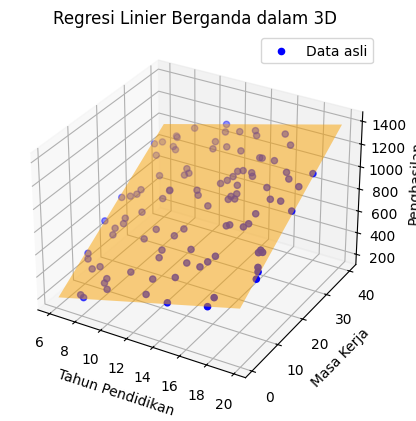

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Memuat data dari file CSV dengan pemisah titik koma
data = pd.read_csv('../csv/Multiple_linear_regression_data.csv', sep=';')

# Memeriksa nama kolom
print("Kolom yang ada dalam file CSV:", data.columns)


# Menggabungkan tahun_pendidikan dan masa_kerja menjadi satu matriks
X = np.column_stack((tahun_pendidikan, masa_kerja))

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, penghasilan)

# Memprediksi nilai penghasilan
penghasilan_pred = model.predict(X)

# Membuat grid untuk bidang regresi
# np.meshgrid = digunakan untuk membuat grid 2D dari dua array 1D
xx, yy = np.meshgrid(np.linspace(tahun_pendidikan.min(), tahun_pendidikan.max(), 10),
                     np.linspace(masa_kerja.min(), masa_kerja.max(), 10))
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy


# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot titik data
ax.scatter(tahun_pendidikan, masa_kerja, penghasilan, color='blue', label='Data asli')

# Plot bidang regresi
ax.plot_surface(xx, yy, zz, color='orange', alpha=0.5, rstride=100, cstride=100)

# Label sumbu
ax.set_xlabel('Tahun Pendidikan')
ax.set_ylabel('Masa Kerja')
ax.set_zlabel('Penghasilan')

# Menampilkan plot
plt.title('Regresi Linier Berganda dalam 3D')
plt.legend()
plt.show()

Koefisien model: [ 4.36865414e+02  2.03191132e+02 -5.81783256e+00  5.29378613e-01
  2.29641521e-02]
Intercept model: -979.5375391925127


c:\Users\Galih Setiawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


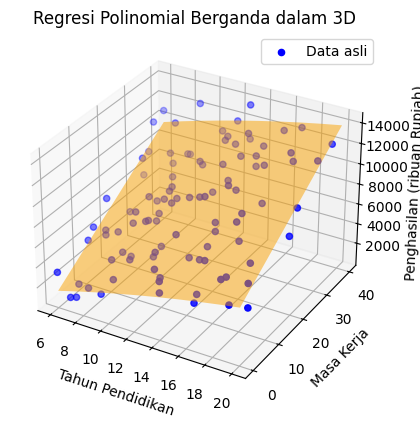

Prediksi penghasilan untuk 16 tahun pendidikan dan 10 tahun masa kerja adalah: 6639.85 ribu rupiah


c:\Users\Galih Setiawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Membuat data sintetis yang lebih realistis untuk Indonesia
np.random.seed(0)
tahun_pendidikan = np.random.randint(6, 21, 100)  # Pendidikan antara 6 hingga 20 tahun
masa_kerja = np.random.randint(0, 41, 100)  # Masa kerja antara 0 hingga 40 tahun
penghasilan = 300 * tahun_pendidikan + 200 * masa_kerja + np.random.randn(100) * 1000  # Penghasilan dalam ribuan rupiah

# Membuat DataFrame
data = pd.DataFrame({
    'Tahun_pendidikan': tahun_pendidikan,
    'masa_kerja': masa_kerja,
    'penghasilan': penghasilan
})

# Memisahkan fitur dan label
X = data[['Tahun_pendidikan', 'masa_kerja']]
y = data['penghasilan']

# Membuat polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_poly, y)

# Memprediksi nilai penghasilan
data['prediksi_penghasilan'] = model.predict(X_poly)

# Menampilkan koefisien model
print(f"Koefisien model: {model.coef_}")
print(f"Intercept model: {model.intercept_}")

# Membuat grid untuk bidang regresi
xx, yy = np.meshgrid(np.linspace(data['Tahun_pendidikan'].min(), data['Tahun_pendidikan'].max(), 10),
                     np.linspace(data['masa_kerja'].min(), data['masa_kerja'].max(), 10))
xx_flat = xx.flatten()
yy_flat = yy.flatten()
grid = np.column_stack((xx_flat, yy_flat))
grid_poly = poly.transform(grid)
zz = model.predict(grid_poly).reshape(xx.shape)

# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot titik data
ax.scatter(data['Tahun_pendidikan'], data['masa_kerja'], data['penghasilan'], color='blue', label='Data asli')

# Plot bidang regresi
ax.plot_surface(xx, yy, zz, color='orange', alpha=0.5, rstride=100, cstride=100)

# Label sumbu
ax.set_xlabel('Tahun Pendidikan')
ax.set_ylabel('Masa Kerja')
ax.set_zlabel('Penghasilan (ribuan Rupiah)')

# Menampilkan plot
plt.title('Regresi Polinomial Berganda dalam 3D')
plt.legend()
plt.show()

# Menambahkan bagian untuk prediksi dengan data baru
# Contoh data baru: seseorang dengan 16 tahun pendidikan dan 10 tahun masa kerja
tahun_pendidikan_baru = 16
masa_kerja_baru = 10
X_baru = np.array([[tahun_pendidikan_baru, masa_kerja_baru]])
X_baru_poly = poly.transform(X_baru)

# Melakukan prediksi penghasilan
penghasilan_pred_baru = model.predict(X_baru_poly)
print(f"Prediksi penghasilan untuk {tahun_pendidikan_baru} tahun pendidikan dan {masa_kerja_baru} tahun masa kerja adalah: {penghasilan_pred_baru[0]:.2f} ribu rupiah")
